<a href="https://colab.research.google.com/github/AvokrichA/Machine_learning/blob/main/Machine_learning_Home_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на набор данных:
https://drive.google.com/file/d/1Mk3JG5HpY0Nnj2AH6vrFkNKVCaStBHtL/view?usp=sharing

Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.
цена продажи (SalePrice, зависимая переменная),
наземная жилая зона (GrLivArea),
общее качество (Overall Quality),
территория гаража (GarageArea),
условия сделки (SaleCondition).
Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
sales = pd.read_csv('sales.csv')
sales.columns

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual', 'Street',
       'SaleCondition'],
      dtype='object')

In [44]:
x = sales.SalePrice
y = sales.OverallQual

sales.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


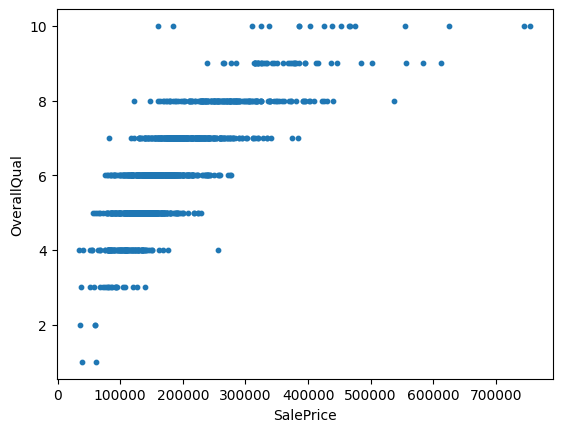

In [57]:
plt.scatter(sales['SalePrice'], sales['OverallQual'], s=10)
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.show()


Мы хотим найти зависимость с помощью линейной регресии.
Разделим исходные данные на обучающую и тестовую выборки в соотношении
70% и 30%.



In [48]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sales, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

Для построения самой модели импортируем класс LinearRegression из
sklearn.linear_model.


In [50]:
from sklearn.linear_model import LinearRegression


Теперь у нас есть всё необходимое для построения модели.
Создадим экземпляр класса LinearRegression, который будет содержать в себе
модель регрессии.


In [51]:
model = LinearRegression()


Чтобы обучить модель, необходимо вызвать метод .fit() на объект model. В качестве
аргументов здесь передаются матрица X и целевая функция Y.
Обучать модель будем на обучающей выборке.


In [61]:
model = LinearRegression().fit(train[['SalePrice']], train[['OverallQual']])



In [62]:
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: [3.59189717]
w_1: [[1.38977085e-05]]


Полученная модель имеет вид y* = 3.59 + 1.39*x1

Теперь можно использовать модель для прогноза значений. Для этого будем
использовать метод .predict(). В качестве аргументов для данного метода требуется
матрица X.


In [63]:
y_predict_train = model.predict(train[['SalePrice']])
print(y_predict_train[:, 0][:10])

[4.65507187 5.32911073 5.81553052 6.3075094  9.3635877  5.88501907
 8.83725369 6.16297324 5.99620073 4.89133291]


Проверим этот расчёт по найденной формуле

In [78]:
OverallQual_predict_train = model.intercept_ + model.coef_ * train[['SalePrice']]
print(OverallQual_predict_train[:10])

     SalePrice
250   4.655072
228   5.329111
40    5.815531
428   6.307509
278   9.363588
975   5.885019
336   8.837254
95    6.162973
682   5.996201
736   4.891333


Посмотрим на графике, какую модель получили.

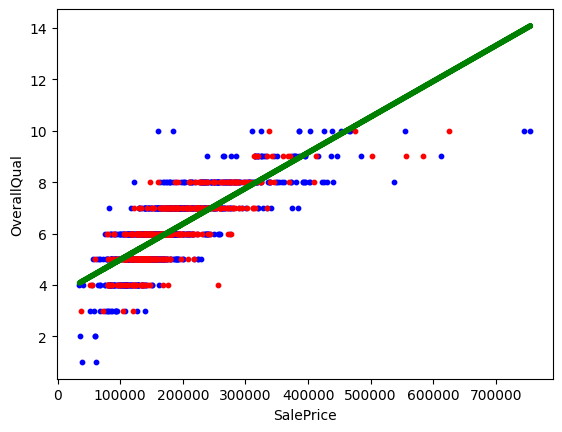

In [79]:
plt.plot(train['SalePrice'], OverallQual_predict_train, linewidth=4, c='g')
plt.scatter(train['SalePrice'], train['OverallQual'], s=10, c='b')
plt.scatter(test['SalePrice'], test['OverallQual'], s=10, c='r')
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.show()

Чтобы получить результаты модели по тестовой выборке, выполним
следующее:

In [81]:
OverallQual_predict_test = model.predict(test[['SalePrice']])


Оценим качество модели с помощью MSE.

In [82]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(train[['OverallQual']], OverallQual_predict_train)
test_mse = mean_squared_error(test[['OverallQual']], OverallQual_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.7587749439264615
Test MSE: 0.6154156178788422


Оценим также качество модели с помощью MAE.

In [83]:
from sklearn.metrics import mean_absolute_error
train_mae = mean_absolute_error(train[['OverallQual']], OverallQual_predict_train)
test_mae = mean_absolute_error(test[['OverallQual']], OverallQual_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 0.6796694041131657
Test MAE: 0.6170206690181645
